# **Required Libraries and Modules**

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import seaborn as sns
import statsmodels.api as sm

# **EDA** **and** **bold text** **Preprocessing** **Of** **Dataset**

In [17]:
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [18]:
print(df.describe())
print(df.info())

       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        950.000000       950.000000  950.000000   950.000000   
mean          27.070547         2.476842    3.502989     1.233316   
std           19.905300         1.102249    0.870162     0.429816   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.632500         1.250000    2.730000     0.860000   
50%           25.830000         2.000000    3.520000     1.220000   
75%           38.405000         3.000000    4.260000     1.610000   
max          146.067047         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
count       950.000000             950.000000  951.000000  
mean          0.292916              62.118116   56.874773  
std           0.115592              32.154406   40.469791  
min           0.100000               5.010000    6.126900  
25%           0.190000              35.882500   33.742650  
50%           0.29

In [19]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [20]:
df = df.dropna()
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,27.772941,2.533808,3.509893,1.219858,0.288221,61.825089,57.663525
std,21.153175,1.108915,0.871082,0.430351,0.114834,32.128436,43.958741
min,1.270000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.135000,2.000000,2.722500,0.840000,0.190000,36.530000,33.583875
50%,26.420000,3.000000,3.545000,1.200000,0.280000,61.210000,50.157850
75%,38.827500,4.000000,4.260000,1.580000,0.387500,88.435000,69.146575
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [22]:
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [23]:
df.head(15)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.262400
2,36.870000,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.903200
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.202800
12,41.790000,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.132800
14,9.910000,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.991400
15,9.990000,Night,Weekday,4.0,High,Clear,4.33,0.85,0.43,34.00,27.441500
16,15.910000,Morning,Weekday,4.0,Low,Clear,4.42,1.77,0.21,114.93,56.716000
17,26.710000,Afternoon,Weekend,4.0,Low,Rain,4.30,1.59,0.20,111.18,69.004900
20,30.980000,Afternoon,Weekend,1.0,Low,Rain,4.50,0.84,0.25,57.02,44.778200
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509


# **Plots For Pattern Findings and Visual Representation**

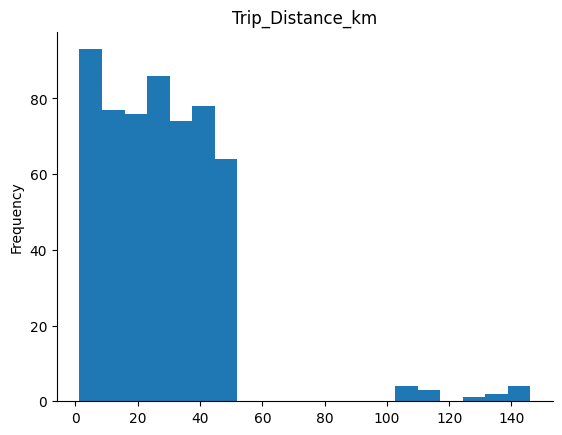

In [24]:
df['Trip_Distance_km'].plot(kind='hist', bins=20, title='Trip_Distance_km')
plt.gca().spines[['top', 'right',]].set_visible(False)

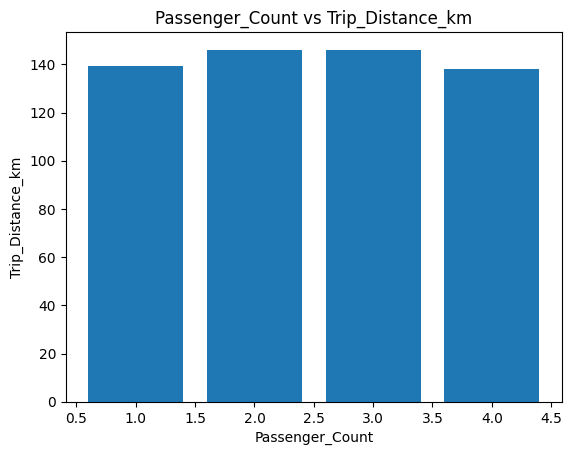

In [25]:
plt.bar(df['Passenger_Count'], df['Trip_Distance_km'])
plt.xlabel('Passenger_Count')
plt.ylabel('Trip_Distance_km')
plt.title('Passenger_Count vs Trip_Distance_km')
plt.show()

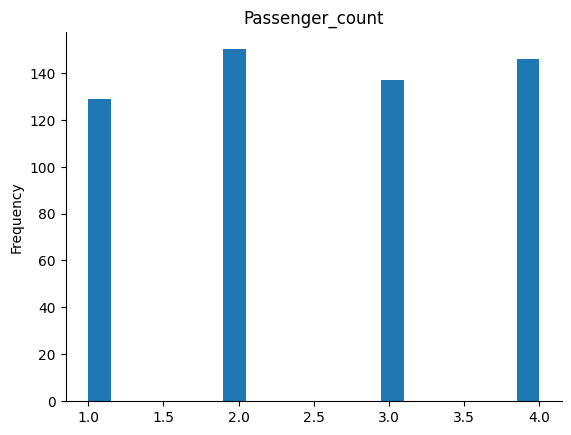

In [26]:
df['Passenger_Count'].plot(kind='hist', bins=20, title='Passenger_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

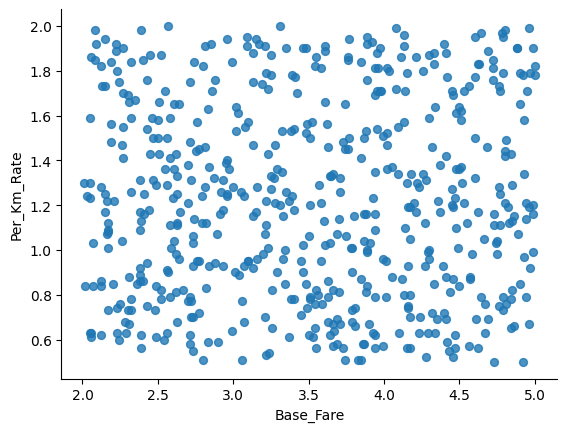

In [27]:
df.plot(kind='scatter', x='Base_Fare', y='Per_Km_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

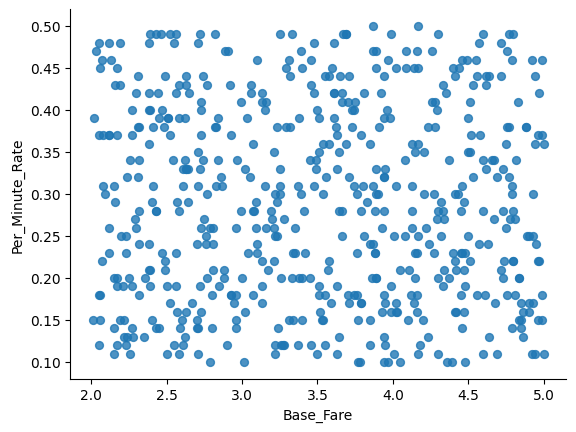

In [28]:
df.plot(kind='scatter', x='Base_Fare', y='Per_Minute_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

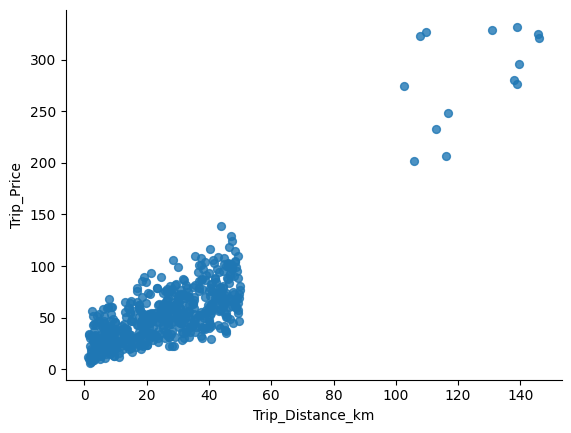

In [29]:
df.plot(kind='scatter', x='Trip_Distance_km', y='Trip_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

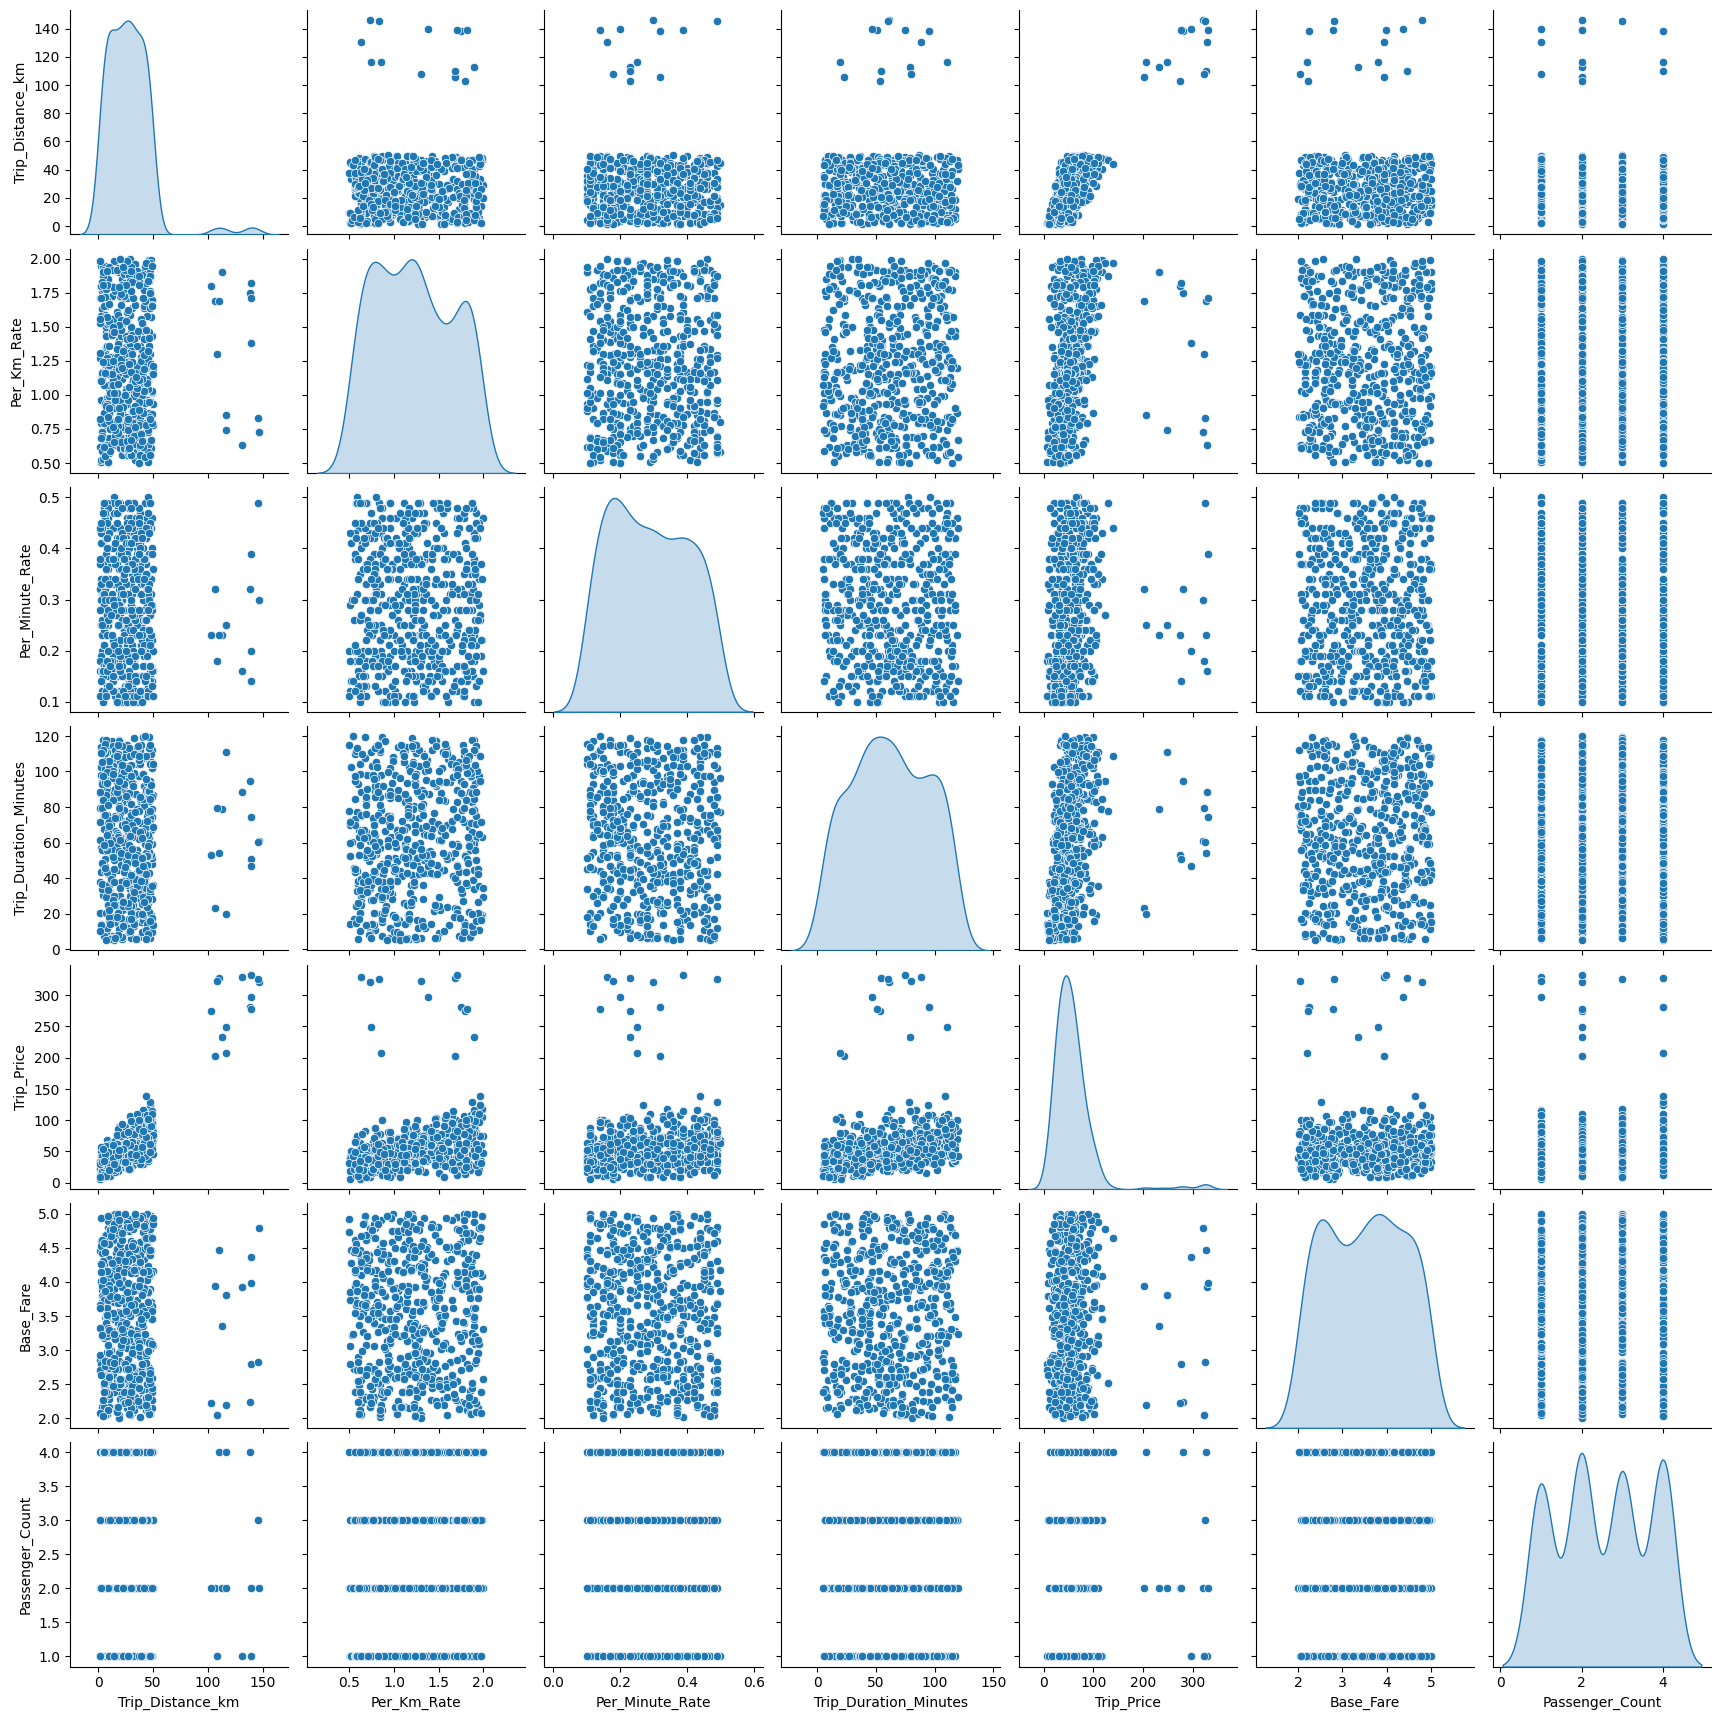

In [30]:
sns.pairplot(df[['Trip_Distance_km', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes','Trip_Price','Base_Fare','Passenger_Count']], diag_kind='kde')

# **Hypothesis** **Testing**

Null Hypothesis
𝐻0​:
None of the predictors have a statistically significant relationship with the target variable.

Alternative Hypothesis
𝐻1:
At least one predictor has a statistically significant relationship with the target variable.

In [42]:
models = {
    'Passenger_Count': ['Trip_Distance_km', 'Trip_Price', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Per_Km_Rate', 'Base_Fare'],
    'Trip_Distance_km': ['Passenger_Count', 'Trip_Price', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Per_Km_Rate', 'Base_Fare'],
    'Trip_Price': ['Trip_Distance_km', 'Passenger_Count', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Per_Km_Rate', 'Base_Fare'],
    'Trip_Duration_Minutes': ['Trip_Distance_km', 'Trip_Price', 'Passenger_Count', 'Per_Minute_Rate', 'Per_Km_Rate', 'Base_Fare'],
    'Per_Minute_Rate': ['Trip_Distance_km', 'Trip_Price', 'Trip_Duration_Minutes', 'Passenger_Count', 'Per_Km_Rate', 'Base_Fare'],
    'Per_Km_Rate': ['Trip_Distance_km', 'Trip_Price', 'Trip_Duration_Minutes', 'Passenger_Count', 'Per_Minute_Rate', 'Base_Fare'],
    'Base_Fare': ['Trip_Distance_km', 'Trip_Price', 'Trip_Duration_Minutes', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate'],
}

hypothesis_results = {}

for target, predictors in models.items():
    X = sm.add_constant(df[predictors])
    y = df[target]
    model = sm.OLS(y, X).fit()


    f_p_value = model.f_pvalue
    r_squared = model.rsquared
    significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()


    if f_p_value < 0.05:
        decision = "✅ Reject H0: Significant relationship exists (Accept H1)"
    else:
        decision = "❌ Fail to reject H0: No significant relationship"


    hypothesis_results[target] = {
        "R-squared": round(r_squared, 4),
        "F-test p-value": round(f_p_value, 4),
        "Significant Predictors": [p for p in significant_predictors if p != "const"],
        "Decision": decision
    }

for target, result in hypothesis_results.items():
    print("="*70)
    print(f"Hypothesis Test: {target} ~ [Predictors]")
    print("="*70)
    print(f"R-squared               : {result['R-squared']}")
    print(f"F-test p-value          : {result['F-test p-value']}")
    print(f"Significant Predictors  : {result['Significant Predictors']}")
    print(f"Decision                : {result['Decision']}")
    print("\n")

Hypothesis Test: Passenger_Count ~ [Predictors]
R-squared               : 0.0281
F-test p-value          : 0.0146
Significant Predictors  : ['Per_Km_Rate']
Decision                : ✅ Reject H0: Significant relationship exists (Accept H1)


Hypothesis Test: Trip_Distance_km ~ [Predictors]
R-squared               : 0.8703
F-test p-value          : 0.0
Significant Predictors  : ['Trip_Price', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Per_Km_Rate']
Decision                : ✅ Reject H0: Significant relationship exists (Accept H1)


Hypothesis Test: Trip_Price ~ [Predictors]
R-squared               : 0.8869
F-test p-value          : 0.0
Significant Predictors  : ['Trip_Distance_km', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Per_Km_Rate']
Decision                : ✅ Reject H0: Significant relationship exists (Accept H1)


Hypothesis Test: Trip_Duration_Minutes ~ [Predictors]
R-squared               : 0.2976
F-test p-value          : 0.0
Significant Predictors  : ['Trip_Distance_km', '

# **Machine Model Building**

In [31]:
model = LinearRegression()
X = df[['Trip_Distance_km','Passenger_Count','Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']]
y = df['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

pickle.dump(model, open('taxilinearmodel.pkl', 'wb'))

Mean Squared Error: 237.43996985126674
R-squared: 0.8907353230174284


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Trip_Distance_km','Passenger_Count','Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']]
y = df['Trip_Price']
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

pickle.dump(model, open('taxiploylinearmodel.pkl', 'wb'))

Mean Squared Error: 0.0004665670282037159
R-squared: 0.9999997581216475


# **Testing of Models**


In [33]:
#test for new data
linear_model = pickle.load(open('taxilinearmodel.pkl', 'rb'))
polynomial_linear_model = pickle.load(open('taxiploylinearmodel.pkl', 'rb'))
test = [19.350000,3	,3.56,0.80,0.32,53.82]
print('Result of Linear model:\n',linear_model.predict([test]))
print('Result of Polynomial linear:\n',polynomial_linear_model.predict(poly.fit_transform([test])))

Result of Linear model:
 [31.2477561]
Result of Polynomial linear:
 [36.22353786]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
model = pickle.load(open('taxiploylinearmodel.pkl','rb'))
test = [15.910000,4,4.42,	1.77,0.21,114.93]
model.predict(poly.fit_transform([test]))

array([56.70871137])